In [1]:
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
import numpy as np

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['price'] = data['target']

target     = 'price'
predictors = list(set(df.columns) - set([target]))

df['strata'] = pd.qcut(df[target], q=10)
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['strata'], random_state=123)


1. Build a regression tree to predict the price.
   Do 4-fold cross validation and report the average error for each fold.

In [3]:
X_train = df_train[predictors]
y_train = df_train[target]

X_test= df_test[predictors]
y_test=df_test[target]

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('mse: ', mse)

mse:  0.5457208473011077


In [25]:
# cross validation, https://scikit-learn.org/stable/modules/cross_validation.html

kfold = KFold(n_splits = 4, random_state = 1)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

0.5981913508437188


### 2. Repeat step 1 using a random forest with 20 trees, with the same tree hyperparameters as above.

In [46]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#lab_enc = LabelEncoder()
#training_scores_encoded = lab_enc.fit_transform(y_train)


rf=RandomForestRegressor(n_estimators=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred_rf=rf.predict(X_test)

#eval

mse_rf = mean_squared_error(y_test, y_pred_rf)
print('random forest mse: ', mse_rf)

random forest mse:  0.2668403970924886


## 3. Try fitting a Lasso and Ridge regression model without feature engineering. 
   What is the optimal lambda? Why would this be the case?

In [63]:
# Lasso

results   = {} # contains the test mse for each value of lambda
reg_paths = {} # contains the coefficients for each value of lambda

 

for lambda_ in np.linspace(0,1,10):
    # Fit the model
    model = Lasso(alpha=lambda_)
    model.fit(X_train, y_train)
    coefficients = dict(zip(predictors, model.coef_))
    reg_paths[lambda_] = coefficients
    
    # Evaluate the model on test set
    y_hat_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat_test)
    results[lambda_] = mse

C:\Users\BrigitteKudor\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # This is added back by InteractiveShellApp.init_path()
C:\Users\BrigitteKudor\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\BrigitteKudor\ANACONDA\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4311.590379254732, tolerance: 2.1938732522213593
  positive)


AttributeError: 'AxesSubplot' object has no attribute 'show'

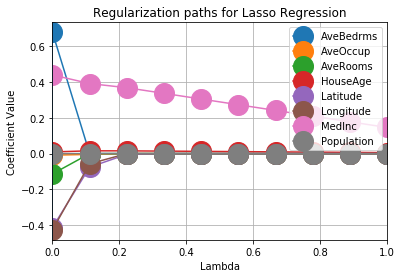

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df_params = pd.DataFrame(reg_paths).T
df_params.plot(ax=ax, marker='o', markersize=20)
ax.grid()
ax.set_xlabel('Lambda')
ax.set_ylabel('Coefficient Value')
ax.set_title('Regularization paths for Lasso Regression')
ax.axvline(min(results, key=results.get))
ax.show()

In [6]:
# RIDGE

results   = {} # contains the test mse for each value of lambda
reg_paths = {} # contains the coefficients for each value of lambda

 

for lambda_ in np.linspace(0,1,10):
    # Fit the model
    model = Ridge(alpha=lambda_)
    model.fit(X_train, y_train)
    coefficients = dict(zip(predictors, model.coef_))
    reg_paths[lambda_] = coefficients
    
    # Evaluate the model on test set
    y_hat_test = model.predict(X_test)
    mse = mean_squared_error(y_test, y_hat_test)
    results[lambda_] = mse

### 5. Try hyperparameter tuning for trees and random forests.
   Which hyperparameters are best for prediction?
    Use Grid Search 